In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from hvplot import hvPlot
import holoviews as hv
from datetime import datetime


In [9]:
data=pd.read_csv("cycling.csv")

##--------Data Formatting------------------## 

data["Date"]=pd.to_datetime(data["Date"], format="%m/%d/%Y %H:%M")
data["Calories"]=data["Calories"].str.replace(",","").astype(int)
data["Avg HR"]=data["Avg HR"].str.replace("--", "0").astype(int)
data["Max HR"]=data["Max HR"].str.replace("--", "0").astype(int)
data["Avg Speed"]=data["Avg Speed"].str.replace("--", "0").astype(float)
data["Max Speed"]=data["Max Speed"].str.replace("--", "0").astype(float)
data["Elev Gain"]=data["Elev Gain"].str.replace("--", "0").str.replace(",","").astype(int)
data["Elev Loss"]=data["Elev Loss"].str.replace("--", "0").str.replace(",","").astype(int)
data["Avg Bike Cadence"]=data["Avg Bike Cadence"].str.replace("--", "0").astype(int)
data["Max Bike Cadence"]=data["Max Bike Cadence"].str.replace("--", "0").astype(int)
data["Normalized Power"]=data["Normalized Power"].str.replace("--","0").astype(int)
data["Max Avg Power (20 min)"]=data["Max Avg Power (20 min)"].str.replace("--","0").astype(int)
data["Power"]=data["Power"].str.replace("--","0").astype(int)
data["Max Power"]=data["Max Power"].str.replace("--","0").astype(int)


data

,Activity Type,Date,Distance,Calories,Time,Avg HR,Max HR,Avg Speed,Max Speed,Elev Gain,Elev Loss,Avg Bike Cadence,Max Bike Cadence,Normalized Power,Training Stress Score(TSS),Max Avg Power (20 min),Power,Max Power
0,cycling,2018-06-03 09:55:00,1.50,73,11:47,126,180,7.6,14.4,3,0,52,87,0,0.0,0,0,0
1,cycling,2018-06-03 09:05:00,19.14,584,49:34:00,177,187,23.2,30.4,361,354,83,106,0,0.0,0,0,0
2,road_biking,2018-06-03 08:25:00,0.01,159,22:18,130,155,0.0,0.0,0,0,77,108,0,0.0,0,0,0
3,indoor_cycling,2018-06-02 13:45:00,0.00,2,00:13.9,152,158,0.0,0.0,0,0,86,94,0,0.0,0,156,431
4,cyclocross,2018-05-03 19:02:00,2.32,204,34:36:00,121,146,4.0,8.2,59,66,0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,cycling,2018-02-25 14:13:00,0.78,11,06:47.1,130,182,6.9,16.2,7,3,77,98,55,0.7,0,31,450
156,indoor_cycling,2018-01-13 15:23:00,1.60,21,06:49.2,129,139,14.1,15.8,0,0,0,0,53,0.8,0,52,108
157,road_biking,2018-05-06 13:44:00,1.33,16,12:00,107,129,6.6,21.5,30,33,54,105,48,0.9,13,24,296
158,road_biking,2018-06-02 16:29:00,0.36,4,03:15.6,118,130,6.6,10.2,0,0,66,96,37,0.1,0,24,85


In [3]:
data.isna().sum()

Activity Type                  0
Date                           0
Distance                       0
Calories                       0
Time                           0
Avg HR                         0
Max HR                         0
Avg Speed                      0
Max Speed                      0
Elev Gain                      0
Elev Loss                      0
Avg Bike Cadence               0
Max Bike Cadence               0
Normalized Power               0
Training Stress Score(TSS)     0
Max Avg Power (20 min)         0
Power                          0
Max Power                      0
dtype: int64

In [4]:
data.dtypes

Activity Type                          object
Date                           datetime64[ns]
Distance                              float64
Calories                                int64
Time                                   object
Avg HR                                  int64
Max HR                                  int64
Avg Speed                             float64
Max Speed                             float64
Elev Gain                               int64
Elev Loss                               int64
Avg Bike Cadence                        int64
Max Bike Cadence                        int64
Normalized Power                        int64
Training Stress Score(TSS)            float64
Max Avg Power (20 min)                  int64
Power                                   int64
Max Power                               int64
dtype: object

In [57]:
pd.options.display.float_format = '{:.2f}'.format

data.describe()

,Distance,Calories,Avg HR,Max HR,Avg Speed,Max Speed,Elev Gain,Elev Loss,Avg Bike Cadence,Max Bike Cadence,Normalized Power,Training Stress Score(TSS),Max Avg Power (20 min),Power,Max Power
count,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00
mean,21.22,603.99,138.05,164.04,15.18,25.37,189.01,185.29,64.12,87.39,140.03,73.69,123.54,114.67,486.16
std,19.60,511.56,42.43,49.13,5.15,8.14,475.22,457.18,36.18,49.62,57.58,69.51,77.61,48.68,223.56
min,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7.24,201.75,134.75,165.50,13.67,22.30,0.00,0.00,54.00,86.00,119.50,10.97,36.00,96.00,359.00
50%,17.24,523.00,150.00,180.00,16.10,26.00,10.00,10.00,83.00,110.00,159.00,64.70,154.00,129.50,525.50
75%,27.32,811.00,158.00,188.00,18.40,29.57,139.50,146.50,87.00,119.00,178.25,110.33,182.00,147.00,657.75
max,98.94,2442.00,180.00,196.00,23.20,50.80,2946.00,2772.00,96.00,156.00,228.00,316.60,228.00,197.00,857.00


## General Correlation 

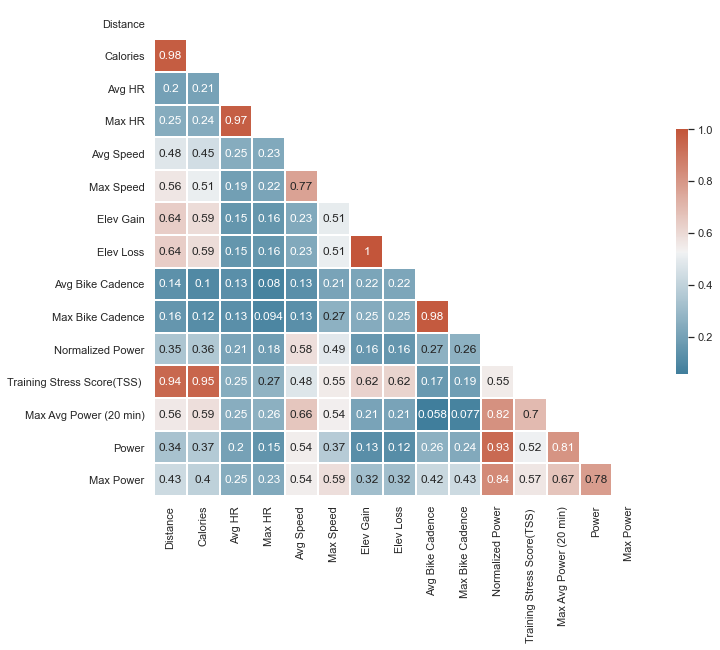

In [11]:
d, ax1 = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set_theme(style="white")
mask = np.triu(np.ones_like(data.corr(), dtype=bool))


sns.heatmap(data.corr(), mask=mask,cmap=cmap,vmax=1, linewidths=0.99, cbar_kws={"shrink": .5},annot=True);

##  Calories and Distance (hard workout) - Correlation is 0.98

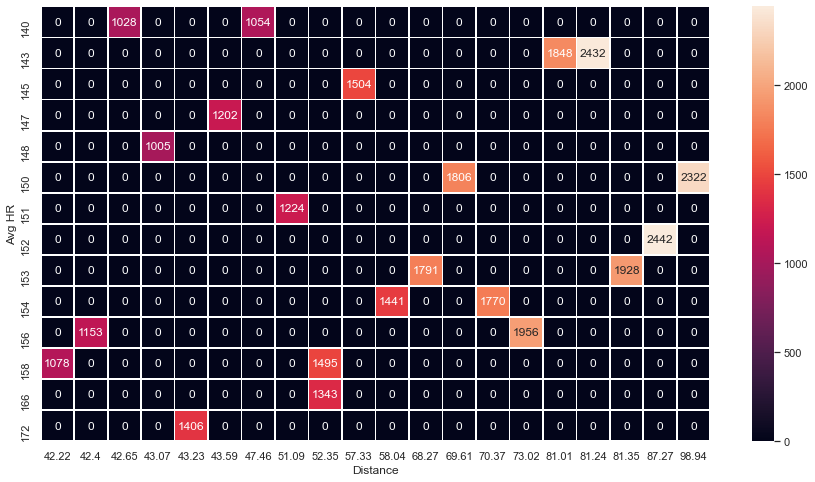

In [12]:
sns.set_theme()

hard_workout=(data[(data["Calories"]>1000) & (data["Avg HR"]>0)&(data["Distance"]>40)]
.pivot_table(index="Avg HR",columns="Distance",values="Calories", fill_value=0))

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(hard_workout, annot=True, fmt="d", linewidths=.7, ax=ax);

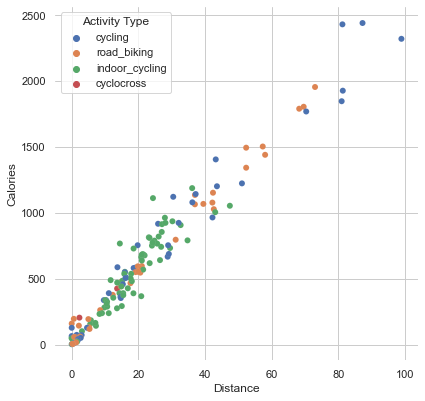

In [13]:
sns.set_theme(style="whitegrid")
h,ax2=plt.subplots(figsize=(6.5,6.5))
sns.despine(h, left=True, bottom=True)

sns.scatterplot(x=data.Distance,y=data.Calories, hue=data["Activity Type"],linewidth=0.04, ax=ax2);

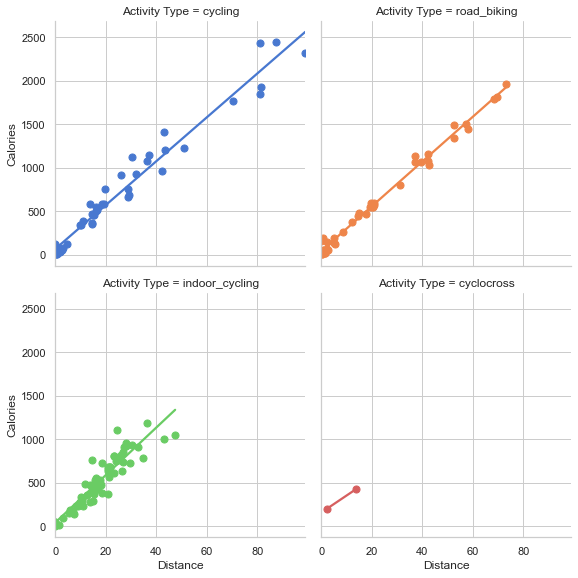

In [14]:
sns.lmplot(x="Distance", y="Calories", col="Activity Type", hue="Activity Type", data=data,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

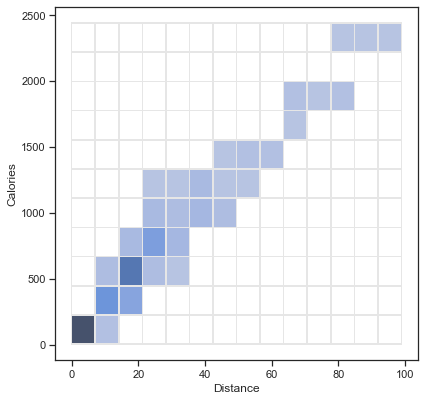

In [15]:
sns.set_theme(style="ticks")
h,ax2=plt.subplots(figsize=(6.5,6.5))
sns.despine(f)

sns.histplot(x=data.Distance,
             y=data.Calories,
             multiple="stack",
             palette="light:m_r",
             edgecolor=".9",
             linewidth=.5,
            );

## Max HR and Avg HR (Corr: 0.97)

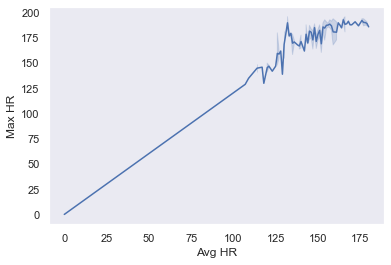

In [16]:
sns.set_theme(style="dark")
sns.lineplot(x="Avg HR", y="Max HR", data=data);


## Training Stress Score and Distance

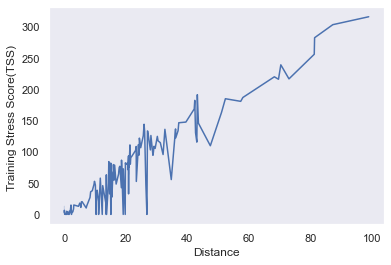

In [22]:
sns.lineplot(y="Training Stress Score(TSS) ", x="Distance", data=data);


/Users/Anna/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


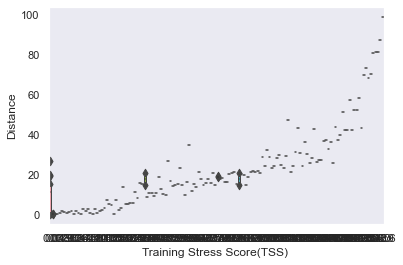

In [31]:
sns.boxenplot(data["Training Stress Score(TSS) "], data.Distance);


## Training Stress Score and Calories (corr 0.95)

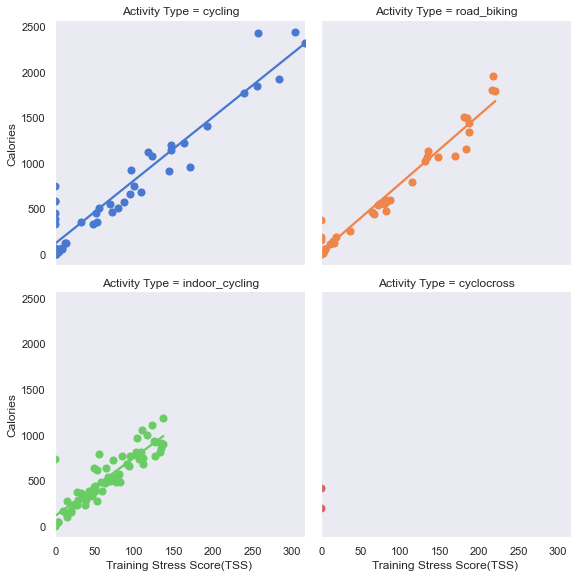

In [35]:
sns.lmplot(x="Training Stress Score(TSS) ", y="Calories", col="Activity Type", hue="Activity Type",data=data,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

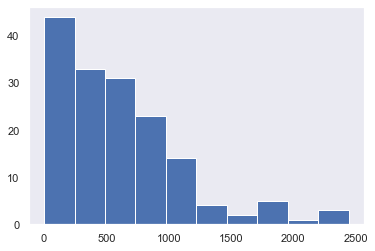

In [51]:
plt.hist( data["Calories"]);

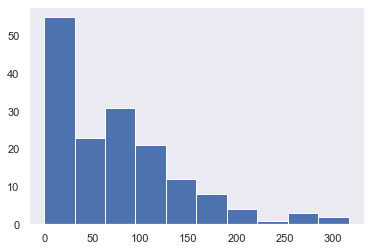

In [50]:
plt.hist( data["Training Stress Score(TSS) "]);

## Power and Normalized Power

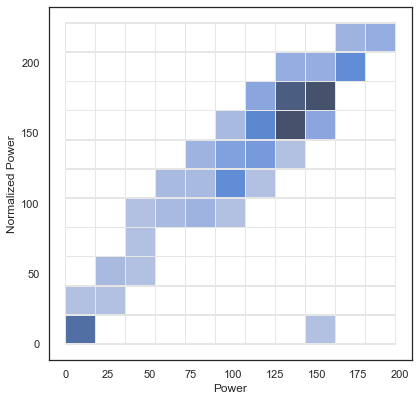

In [54]:
sns.set_theme(style="white")
h,ax2=plt.subplots(figsize=(6.5,6.5))
sns.despine(f)

sns.histplot(x=data.Power,
             y=data["Normalized Power"],
             multiple="stack",
             palette="light:m_r",
             edgecolor=".9",
             linewidth=.5,
            );

In [58]:
data.describe()

,Distance,Calories,Avg HR,Max HR,Avg Speed,Max Speed,Elev Gain,Elev Loss,Avg Bike Cadence,Max Bike Cadence,Normalized Power,Training Stress Score(TSS),Max Avg Power (20 min),Power,Max Power
count,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00
mean,21.22,603.99,138.05,164.04,15.18,25.37,189.01,185.29,64.12,87.39,140.03,73.69,123.54,114.67,486.16
std,19.60,511.56,42.43,49.13,5.15,8.14,475.22,457.18,36.18,49.62,57.58,69.51,77.61,48.68,223.56
min,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7.24,201.75,134.75,165.50,13.67,22.30,0.00,0.00,54.00,86.00,119.50,10.97,36.00,96.00,359.00
50%,17.24,523.00,150.00,180.00,16.10,26.00,10.00,10.00,83.00,110.00,159.00,64.70,154.00,129.50,525.50
75%,27.32,811.00,158.00,188.00,18.40,29.57,139.50,146.50,87.00,119.00,178.25,110.33,182.00,147.00,657.75
max,98.94,2442.00,180.00,196.00,23.20,50.80,2946.00,2772.00,96.00,156.00,228.00,316.60,228.00,197.00,857.00


## Conclusion

- There are 160 records in the dataset
- On average the distance of cyclists was 21.22 km ( with the max of 98.94)
- The average calorries burn is around 600 and it is highly correlated to the distance. 
- Maximum HR is on average around 164 (plis minus 49.13) 
- The Maximum Speed was aroudn 25 km/h . The maximum speed was 50.80
- The Elevation Gain is on average 189m but it has a high standard deviation of 475, so it is better to say that 75% of people have an elevation gain more than 139.50. The same with the Elevation Loss, 75% of people has an elevation loss of more than 146m
